In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import pysal as ps
import geopandas as gpd
from sklearn import cluster
from sklearn.cluster import KMeans
#import pysal.contrib.clusterpy as cp

pd.set_option('display.max_columns',50)
pd.options.display.max_rows

60

In [100]:
initFile = pd.read_csv('listings.csv',index_col= 'id',low_memory=False)
initFile.head(1)

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,...,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,https://www.airbnb.com/rooms/109,20190708161040,2019-07-09,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,NaN,NaN,NaN,NaN,Camelot NEW RESIDENTS’ GENERAL INFORMATION F...,NaN,NaN,https://a0.muscache.com/im/pictures/4321499/1d...,NaN,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States",Search for me on the Internet with the keyword...,NaN,...,2019-07-09,2,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,NaN,"{""Culver City"","" CA""}",f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02


In [98]:
lst = ['listing_url','scrape_id','last_scraped','summary',\
       'space','description','experiences_offered','neighborhood_overview','interaction','access','house_rules',\
       'notes','thumbnail_url','medium_url','picture_url','host_url',\
      'host_about','host_acceptance_rate','host_thumbnail_url','host_picture_url',\
       'host_listings_count','host_has_profile_pic','host_verifications',\
       'neighbourhood','neighbourhood_group_cleansed','market','country_code',\
      'country','is_location_exact','square_feet','weekly_price','monthly_price','minimum_minimum_nights',\
      'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',\
      'minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','has_availability','calendar_last_scraped',\
      'availability_30','availability_60','availability_90','number_of_reviews_ltm',\
       'requires_license','license','jurisdiction_names','is_business_travel_ready','require_guest_profile_picture',\
      'require_guest_phone_verification','calculated_host_listings_count','calculated_host_listings_count_entire_homes',\
      'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','xl_picture_url',\
      ]
initFile.drop(columns=lst,inplace=True)

In [4]:
initFile.head()

,name,transit,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,Amazing bright elegant condo park front *UPGRA...,NaN,521,Paolo,2008-06-27,"San Francisco, California, United States",NaN,NaN,f,Culver City,1.0,t,"Culver City, CA, United States",Culver City,Culver City,CA,90230,"Culver City, CA",33.98209,-118.38494,Condominium,Entire home/apt,6,2.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$122.00,$500.00,$240.00,3,$25.00,30,730,98,2,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,strict_14_with_grace_period,0.02
344,Family perfect;Pool;Near Studios!,Short drive to subway and elevated trains runn...,767,Melissa,2008-07-11,"Burbank, California, United States",within a day,67%,f,Burbank,1.0,t,"Burbank, CA, United States",Burbank,Burbank,CA,91505,"Burbank, CA",34.16562,-118.33458,House,Entire home/apt,6,1.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$168.00,$0.00,$100.00,6,$0.00,2,14,0,6,2016-06-14,2018-10-21,93.0,10.0,10.0,10.0,10.0,10.0,9.0,t,flexible,0.16
2708,Fireplace Mirrored Mini Suit (Website hidden b...,There are many buses; bus stops going in every...,3008,Chas.,2008-09-16,"Los Angeles, California, United States",within an hour,100%,t,Hollywood,2.0,t,"Los Angeles, CA, United States",Hollywood,Los Angeles,CA,90046,"Los Angeles, CA",34.09768,-118.34602,Apartment,Private room,1,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",$79.00,$480.00,$89.00,1,$0.00,28,366,238,20,2014-06-09,2019-05-20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,0.32
2732,Zen Life at the Beach,NaN,3041,Yoga Priestess,2008-09-17,"Santa Monica, California, United States",within an hour,100%,t,Santa Monica,2.0,t,"Santa Monica, CA, United States",Santa Monica,Santa Monica,CA,90405,"Santa Monica, CA",34.00475,-118.48127,Apartment,Private room,1,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S...",$140.00,NaN,$100.00,1,$0.00,1,180,309,18,2011-06-06,2018-11-15,96.0,9.0,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,0.18
2864,*Upscale Professional Home with Beautiful Studio*,Public transportation is a 3 minutes walk to t...,3207,Bernadine,2008-09-25,"Long Beach, California, United States",NaN,NaN,f,Bellflower,1.0,t,"Bellflower, CA, United States",Bellflower,Bellflower,CA,90706,"Bellflower, CA",33.87619,-118.11397,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$80.00,$100.00,$75.00,1,$25.00,2,730,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,NaN


In [5]:
initFile.reset_index(inplace=True)

In [6]:
initFile['colid'] = initFile.index 

In [7]:
initFile.drop('id',axis=1,inplace=True)

In [8]:
initFile.rename(columns={'colid':'id'},inplace=True)
initFile.id +=1

In [9]:
initFile.set_index('id',inplace=True)
initFile.head(1)

,name,transit,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Amazing bright elegant condo park front *UPGRA...,NaN,521,Paolo,2008-06-27,"San Francisco, California, United States",NaN,NaN,f,Culver City,1.0,t,"Culver City, CA, United States",Culver City,Culver City,CA,90230,"Culver City, CA",33.98209,-118.38494,Condominium,Entire home/apt,6,2.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$122.00,$500.00,$240.00,3,$25.00,30,730,98,2,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,strict_14_with_grace_period,0.02


# Cleaning the dataset to make sure we have only CA related values

In [10]:
df = initFile.copy()

In [11]:
df.state.loc[df.state=='California'] = 'CA'
df.state.unique()
df.state = df['state'].str.upper()

C:\Users\Mallika Ganesh\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
df.state.value_counts()

CA    44611
加州        2
NY        2
FL        1
IL        1
加洲        1
Name: state, dtype: int64

# We need to remove the non-CA values from the dataset

In [13]:
df.drop(df[~(df.state.values=='CA')].index,axis=0,inplace=True)

In [14]:
df.columns

Index(['name', 'transit', 'host_id', 'host_name', 'host_since',
       'host_location', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_total_listings_count',
       'host_identity_verified', 'street', 'neighbourhood_cleansed', 'city',
       'state', 'zipcode', 'smart_location', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'availability_365', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy', 'reviews_per_month'],
      dtype='object')

In [15]:
df.city = df.city.str.lower()
df.city.unique()
df.city.dropna(inplace=True)

In [16]:
df['city'] = df['city'].str.replace(r'[^\x00-\x7F]+', '')
df.city.dropna(inplace=True)
df.city.value_counts()

los angeles       27933
long beach         1612
santa monica       1059
west hollywood      973
beverly hills       767
                  ...  
view park             1
porter ranch          1
study city            1
cudahy                1
upland                1
Name: city, Length: 334, dtype: int64

In [17]:
df.groupby('city')['neighbourhood_cleansed'].value_counts()

city                         neighbourhood_cleansed   
                             Rowland Heights              5
                             Monterey Park                2
                             El Monte                     1
                             Hacienda Heights             1
                             Rosemead                     1
                                                         ..
woodland hills, los angeles  Woodland Hills               1
woodland hills/los angeles   Woodland Hills               1
woodland hls                 Woodland Hills               1
wrightwood                   Angeles Crest                2
                             Southeast Antelope Valley    1
Name: neighbourhood_cleansed, Length: 857, dtype: int64

In [18]:
df.smart_location.shape

(44611,)

In [19]:
df.smart_location = df.smart_location.str.lower()

In [20]:
df.smart_location.unique()

array(['culver city, ca', 'burbank, ca', 'los angeles, ca',
       'santa monica, ca', 'bellflower, ca', 'woodland hills, ca',
       'beverly hills, ca', 'venice, ca', 'long beach, ca',
       'redondo beach, ca', 'torrance, ca', 'n hollywood, ca',
       'studio city, ca', 'glendale, ca', 'malibu, ca',
       'san fernando valley, ca', 'lynwood, ca', 'hollywood, ca',
       'granada hills, (los angeles), ca', 'west hollywood, ca',
       'encino, ca', 'north hills, ca', 'carson, ca',
       'north hollywood, ca', 'altadena, ca', 'calabasas, ca',
       'hollywood hills, ca', 'agoura hills-malibu, ca',
       'manhattan beach, ca', 'sherman oaks, ca', 'topanga, ca',
       'rancho palos verdes, ca', 'san gabriel, ca', 'marina del rey, ca',
       'lakewood, ca', 'topanga canyon, ca', 'sierra madre, ca',
       'pasadena, ca', 'agua dulce, ca', 'hermosa beach, ca',
       'compton, ca', 'pacific palisades, ca', 'el segundo, ca',
       'los angeles county, ca', 'inglewood, ca', 'covina

In [21]:
df.isnull().sum()

name                               6
transit                        16942
host_id                            0
host_name                         14
host_since                        14
host_location                    136
host_response_time              7979
host_response_rate              7979
host_is_superhost                 14
host_neighbourhood              7679
host_total_listings_count         14
host_identity_verified            14
street                             0
neighbourhood_cleansed             0
city                              20
state                              0
zipcode                          541
smart_location                     0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         22
bedrooms                          18
beds                              63
bed_type                           0
a

In [22]:
df.drop(df[(df['smart_location'] == '蒙特利帕克, ca') | \
                       (df['smart_location'] == '因達斯特里, ca') | \
                       (df['smart_location'] == '艾尔蒙地, ca') | \
                       (df['smart_location'] == '沃尔纳特, ca') | \
                       (df['smart_location'] == '哈仙达岗, ca') | \
                       (df['smart_location'] == '罗兰高地, ca') | \
                       (df['smart_location'] == '罗兰岗, ca') | \
                       (df['smart_location'] == '天普市, ca') | \
                       (df['smart_location'] == '洛杉矶, ca')  \
                      ].index, inplace = True)

In [23]:
df.smart_location = df.smart_location.str.replace(', ca',' ', regex=True)
df.smart_location = df.smart_location.str.strip()
df.neighbourhood_cleansed = df.neighbourhood_cleansed.str.strip()

In [24]:
df['location'] = ''

In [25]:
df.smart_location = df.smart_location.str.lower()
df.neighbourhood_cleansed = df.neighbourhood_cleansed.str.lower() 
df.location = df.location.str.lower()
df.head()

,name,transit,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,location
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Amazing bright elegant condo park front *UPGRA...,NaN,521,Paolo,2008-06-27,"San Francisco, California, United States",NaN,NaN,f,Culver City,1.0,t,"Culver City, CA, United States",culver city,culver city,CA,90230,culver city,33.98209,-118.38494,Condominium,Entire home/apt,6,2.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$122.00,$500.00,$240.00,3,$25.00,30,730,98,2,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,strict_14_with_grace_period,0.02,
2,Family perfect;Pool;Near Studios!,Short drive to subway and elevated trains runn...,767,Melissa,2008-07-11,"Burbank, California, United States",within a day,67%,f,Burbank,1.0,t,"Burbank, CA, United States",burbank,burbank,CA,91505,burbank,34.16562,-118.33458,House,Entire home/apt,6,1.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$168.00,$0.00,$100.00,6,$0.00,2,14,0,6,2016-06-14,2018-10-21,93.0,10.0,10.0,10.0,10.0,10.0,9.0,t,flexible,0.16,
3,Fireplace Mirrored Mini Suit (Website hidden b...,There are many buses; bus stops going in every...,3008,Chas.,2008-09-16,"Los Angeles, California, United States",within an hour,100%,t,Hollywood,2.0,t,"Los Angeles, CA, United States",hollywood,los angeles,CA,90046,los angeles,34.09768,-118.34602,Apartment,Private room,1,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",$79.00,$480.00,$89.00,1,$0.00,28,366,238,20,2014-06-09,2019-05-20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,0.32,
4,Zen Life at the Beach,NaN,3041,Yoga Priestess,2008-09-17,"Santa Monica, California, United States",within an hour,100%,t,Santa Monica,2.0,t,"Santa Monica, CA, United States",santa monica,santa monica,CA,90405,santa monica,34.00475,-118.48127,Apartment,Private room,1,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S...",$140.00,NaN,$100.00,1,$0.00,1,180,309,18,2011-06-06,2018-11-15,96.0,9.0,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,0.18,
5,*Upscale Professional Home with Beautiful Studio*,Public transportation is a 3 minutes walk to t...,3207,Bernadine,2008-09-25,"Long Beach, California, United States",NaN,NaN,f,Bellflower,1.0,t,"Bellflower, CA, United States",bellflower,bellflower,CA,90706,bellflower,33.87619,-118.11397,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$80.00,$100.00,$75.00,1,$25.00,2,730,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,NaN,


In [26]:
df.location =  df.neighbourhood_cleansed[df['neighbourhood_cleansed']== df['smart_location']]
df.head()

,name,transit,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,location
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Amazing bright elegant condo park front *UPGRA...,NaN,521,Paolo,2008-06-27,"San Francisco, California, United States",NaN,NaN,f,Culver City,1.0,t,"Culver City, CA, United States",culver city,culver city,CA,90230,culver city,33.98209,-118.38494,Condominium,Entire home/apt,6,2.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$122.00,$500.00,$240.00,3,$25.00,30,730,98,2,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,strict_14_with_grace_period,0.02,culver city
2,Family perfect;Pool;Near Studios!,Short drive to subway and elevated trains runn...,767,Melissa,2008-07-11,"Burbank, California, United States",within a day,67%,f,Burbank,1.0,t,"Burbank, CA, United States",burbank,burbank,CA,91505,burbank,34.16562,-118.33458,House,Entire home/apt,6,1.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$168.00,$0.00,$100.00,6,$0.00,2,14,0,6,2016-06-14,2018-10-21,93.0,10.0,10.0,10.0,10.0,10.0,9.0,t,flexible,0.16,burbank
3,Fireplace Mirrored Mini Suit (Website hidden b...,There are many buses; bus stops going in every...,3008,Chas.,2008-09-16,"Los Angeles, California, United States",within an hour,100%,t,Hollywood,2.0,t,"Los Angeles, CA, United States",hollywood,los angeles,CA,90046,los angeles,34.09768,-118.34602,Apartment,Private room,1,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",$79.00,$480.00,$89.00,1,$0.00,28,366,238,20,2014-06-09,2019-05-20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,0.32,NaN
4,Zen Life at the Beach,NaN,3041,Yoga Priestess,2008-09-17,"Santa Monica, California, United States",within an hour,100%,t,Santa Monica,2.0,t,"Santa Monica, CA, United States",santa monica,santa monica,CA,90405,santa monica,34.00475,-118.48127,Apartment,Private room,1,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S...",$140.00,NaN,$100.00,1,$0.00,1,180,309,18,2011-06-06,2018-11-15,96.0,9.0,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,0.18,santa monica
5,*Upscale Professional Home with Beautiful Studio*,Public transportation is a 3 minutes walk to t...,3207,Bernadine,2008-09-25,"Long Beach, California, United States",NaN,NaN,f,Bellflower,1.0,t,"Bellflower, CA, United States",bellflower,bellflower,CA,90706,bellflower,33.87619,-118.11397,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$80.00,$100.00,$75.00,1,$25.00,2,730,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,NaN,bellflower


In [27]:
df.location.isna().value_counts()

True     30817
False    13782
Name: location, dtype: int64

In [28]:
df.location.fillna(df.neighbourhood_cleansed+','+df.smart_location,inplace=True)
df.head()

,name,transit,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,location
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Amazing bright elegant condo park front *UPGRA...,NaN,521,Paolo,2008-06-27,"San Francisco, California, United States",NaN,NaN,f,Culver City,1.0,t,"Culver City, CA, United States",culver city,culver city,CA,90230,culver city,33.98209,-118.38494,Condominium,Entire home/apt,6,2.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$122.00,$500.00,$240.00,3,$25.00,30,730,98,2,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,strict_14_with_grace_period,0.02,culver city
2,Family perfect;Pool;Near Studios!,Short drive to subway and elevated trains runn...,767,Melissa,2008-07-11,"Burbank, California, United States",within a day,67%,f,Burbank,1.0,t,"Burbank, CA, United States",burbank,burbank,CA,91505,burbank,34.16562,-118.33458,House,Entire home/apt,6,1.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$168.00,$0.00,$100.00,6,$0.00,2,14,0,6,2016-06-14,2018-10-21,93.0,10.0,10.0,10.0,10.0,10.0,9.0,t,flexible,0.16,burbank
3,Fireplace Mirrored Mini Suit (Website hidden b...,There are many buses; bus stops going in every...,3008,Chas.,2008-09-16,"Los Angeles, California, United States",within an hour,100%,t,Hollywood,2.0,t,"Los Angeles, CA, United States",hollywood,los angeles,CA,90046,los angeles,34.09768,-118.34602,Apartment,Private room,1,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",$79.00,$480.00,$89.00,1,$0.00,28,366,238,20,2014-06-09,2019-05-20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,0.32,"hollywood,los angeles"
4,Zen Life at the Beach,NaN,3041,Yoga Priestess,2008-09-17,"Santa Monica, California, United States",within an hour,100%,t,Santa Monica,2.0,t,"Santa Monica, CA, United States",santa monica,santa monica,CA,90405,santa monica,34.00475,-118.48127,Apartment,Private room,1,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S...",$140.00,NaN,$100.00,1,$0.00,1,180,309,18,2011-06-06,2018-11-15,96.0,9.0,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,0.18,santa monica
5,*Upscale Professional Home with Beautiful Studio*,Public transportation is a 3 minutes walk to t...,3207,Bernadine,2008-09-25,"Long Beach, California, United States",NaN,NaN,f,Bellflower,1.0,t,"Bellflower, CA, United States",bellflower,bellflower,CA,90706,bellflower,33.87619,-118.11397,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$80.00,$100.00,$75.00,1,$25.00,2,730,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,NaN,bellflower


In [29]:
df.groupby('location')['zipcode'].value_counts().sort_values(ascending=False)

location                     zipcode   
venice,los angeles           90291         1730
hollywood,los angeles        90028         1398
hollywood hills,los angeles  90068          881
westwood,los angeles         90024          646
echo park,los angeles        90026          636
                                           ... 
mid-wilshire,los angeles     90005-3747       1
mid-wilshire,la              90036            1
mid-wilshire,ca              90036            1
mid-city,los angeles         90066            1
                             90036            1
Name: zipcode, Length: 1291, dtype: int64

In [30]:
df.columns


Index(['name', 'transit', 'host_id', 'host_name', 'host_since',
       'host_location', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_total_listings_count',
       'host_identity_verified', 'street', 'neighbourhood_cleansed', 'city',
       'state', 'zipcode', 'smart_location', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'availability_365', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy', 'reviews_per_month', 'location'],
      dtype='object')

# FACT 2

In [78]:
df2 = df[['name','property_type', 'room_type', 'host_neighbourhood', 'location', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location',
       'review_scores_value', 'number_of_reviews', 'first_review', 'last_review', 'availability_365', 'minimum_nights',
       'price', 'reviews_per_month', 'host_response_time', 'host_response_rate', 'cancellation_policy']].copy()

In [80]:
df2.isna().count()

name                           44599
property_type                  44599
room_type                      44599
host_neighbourhood             44599
location                       44599
review_scores_rating           44599
review_scores_accuracy         44599
review_scores_cleanliness      44599
review_scores_checkin          44599
review_scores_communication    44599
review_scores_location         44599
review_scores_value            44599
number_of_reviews              44599
first_review                   44599
last_review                    44599
availability_365               44599
minimum_nights                 44599
price                          44599
reviews_per_month              44599
host_response_time             44599
host_response_rate             44599
cancellation_policy            44599
dtype: int64

In [81]:
df2['number_of_reviews'].value_counts()

0      8655
1      3771
2      2610
3      1845
4      1525
       ... 
495       1
463       1
447       1
526       1
479       1
Name: number_of_reviews, Length: 472, dtype: int64

In [82]:
df2.shape

(44599, 22)

In [83]:
df2.drop(df2[df2.number_of_reviews.values==0].index,axis=0,inplace=True)

In [84]:
df2.shape

(35944, 22)

Different types of airbnb properties and their count

In [85]:
df2.property_type.value_counts()

Apartment                13205
House                    12062
Guesthouse                2184
Condominium               1965
Guest suite               1375
Townhouse                 1136
Bungalow                  1106
Loft                       842
Villa                      606
Hostel                     236
Serviced apartment         230
Cottage                    176
Bed and breakfast          158
Camper/RV                  133
Other                       97
Boutique hotel              82
Tiny house                  68
Cabin                       67
Hotel                       37
Aparthotel                  35
Farm stay                   23
Tent                        20
Castle                      16
Boat                        15
Chalet                      13
Treehouse                   10
Tipi                         7
Yurt                         7
Barn                         5
Earth house                  5
Campsite                     3
Dorm                         3
Dome hou

Grouping the top 10 property types with the number of reviews

In [86]:
df2.groupby('property_type')['number_of_reviews'].count().nlargest(10)

property_type
Apartment      13205
House          12062
Guesthouse      2184
Condominium     1965
Guest suite     1375
Townhouse       1136
Bungalow        1106
Loft             842
Villa            606
Hostel           236
Name: number_of_reviews, dtype: int64

In [87]:
df2.columns

Index(['name', 'property_type', 'room_type', 'host_neighbourhood', 'location',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'number_of_reviews', 'first_review',
       'last_review', 'availability_365', 'minimum_nights', 'price',
       'reviews_per_month', 'host_response_time', 'host_response_rate',
       'cancellation_policy'],
      dtype='object')

In [88]:
df2.dtypes

name                            object
property_type                   object
room_type                       object
host_neighbourhood              object
location                        object
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
number_of_reviews                int64
first_review                    object
last_review                     object
availability_365                 int64
minimum_nights                   int64
price                           object
reviews_per_month              float64
host_response_time              object
host_response_rate              object
cancellation_policy             object
dtype: object

In [89]:
df2.number_of_reviews.nlargest(10)

id
574     813
31      749
2131    709
691     690
1576    645
169     637
1706    623
1520    619
3501    603
1721    598
Name: number_of_reviews, dtype: int64

In [65]:
property_col = df2.property_type.value_counts().nlargest(10)

In [66]:
property_col

Apartment      13205
House          12062
Guesthouse      2184
Condominium     1965
Guest suite     1375
Townhouse       1136
Bungalow        1106
Loft             842
Villa            606
Hostel           236
Name: property_type, dtype: int64

In [67]:
df2.shape

(35944, 21)

# Top 10 property types by the number of reviews

Text(0, 0.5, '')

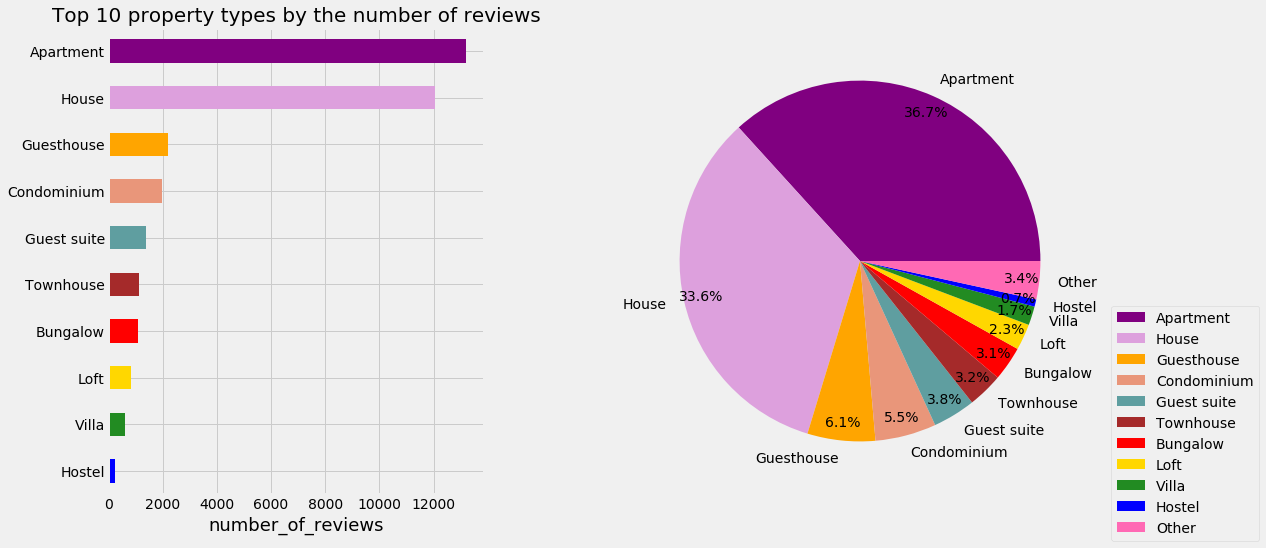

In [68]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "brown",'cadetblue','darksalmon','orange','plum','purple')
df2.property_type.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 property types by the number of reviews",size=20)
ax[0].set_xlabel('number_of_reviews',size=18)


count=df2['property_type'].value_counts()
groups=list(df2['property_type'].value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('purple','plum','orange','darksalmon','cadetblue','brown','red','gold','forestgreen','blue','hotpink')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ioff()
plt.ylabel('')

# Specific type of reviews which people look at when booking an airbnb

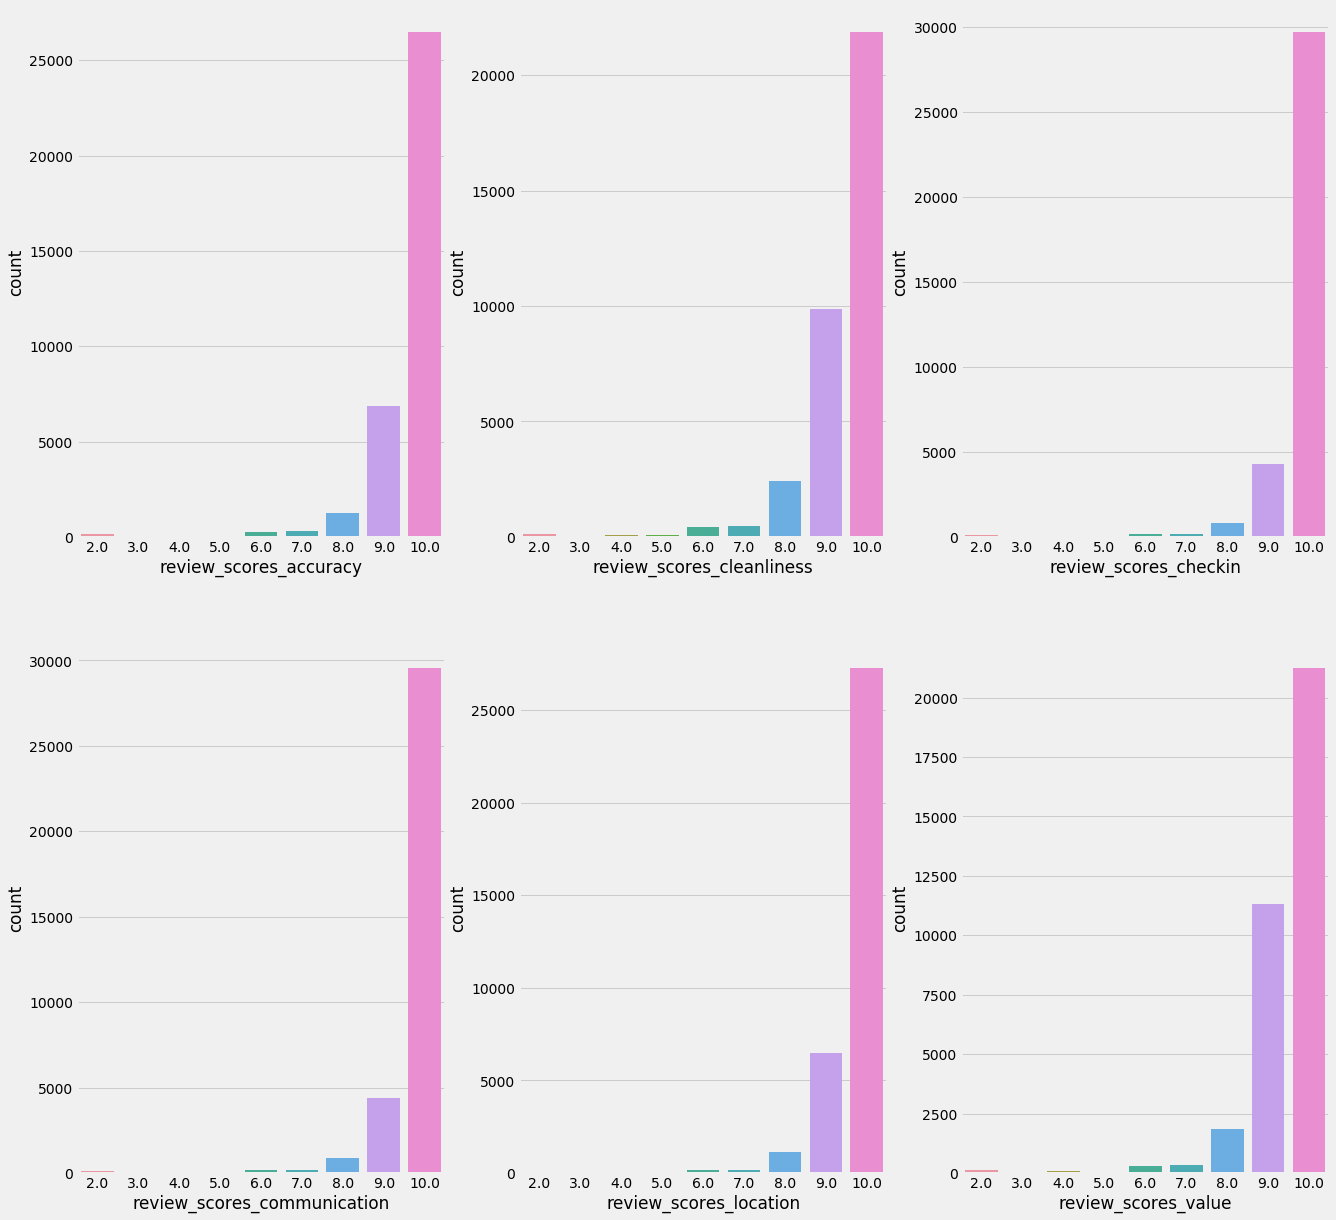

In [69]:
fig,axes= plt.subplots(nrows=2, ncols= 3,figsize=(20,20))


sns.countplot(df2['review_scores_accuracy'],ax=axes[0][0])        

sns.countplot(df2['review_scores_cleanliness'],ax=axes[0][1])

sns.countplot(df2['review_scores_checkin'],ax=axes[0][2])

sns.countplot(df2['review_scores_communication'],ax=axes[1][0])

sns.countplot(df2['review_scores_location'],ax=axes[1][1])

sns.countplot(df2['review_scores_value'],ax=axes[1][2])

# Overall review rating score for each property type

NameError: name 'df2' is not defined

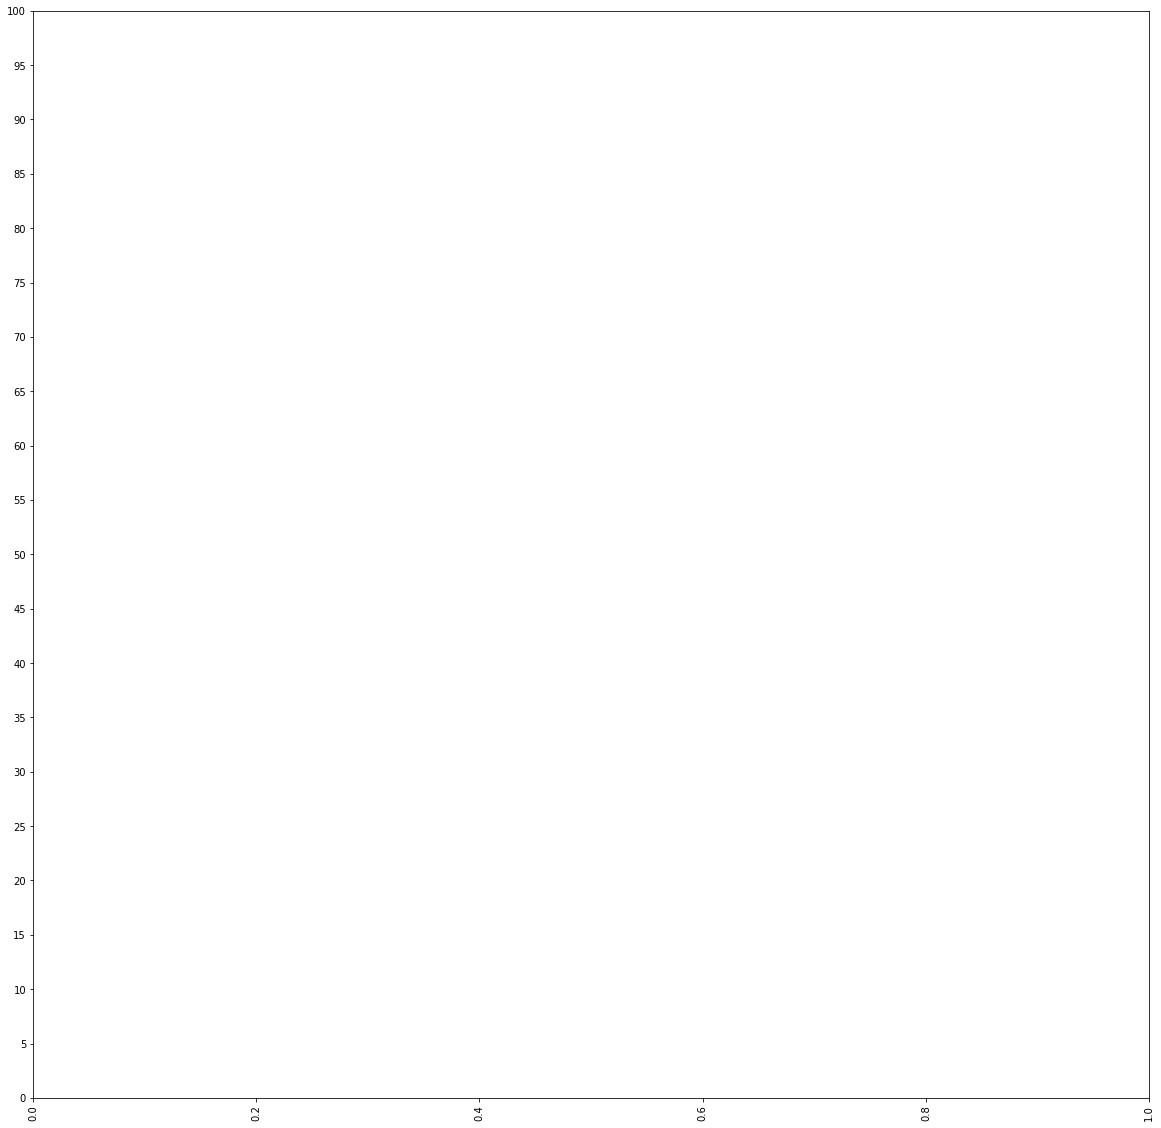

In [4]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
plt.yticks(np.arange(0,105,5))
sns.scatterplot(y='property_type',x='review_scores_rating',size='room_type',hue='room_type',palette='rainbow_r',data=df2)

Different room types in Airbnb

In [71]:
df2['room_type'].value_counts()

Entire home/apt    23292
Private room       11422
Shared room         1230
Name: room_type, dtype: int64

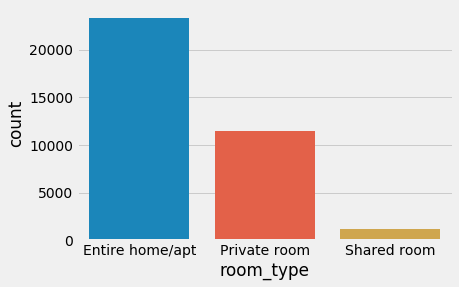

In [72]:
sns.countplot(df2['room_type'])

# Host response time for each of the property type

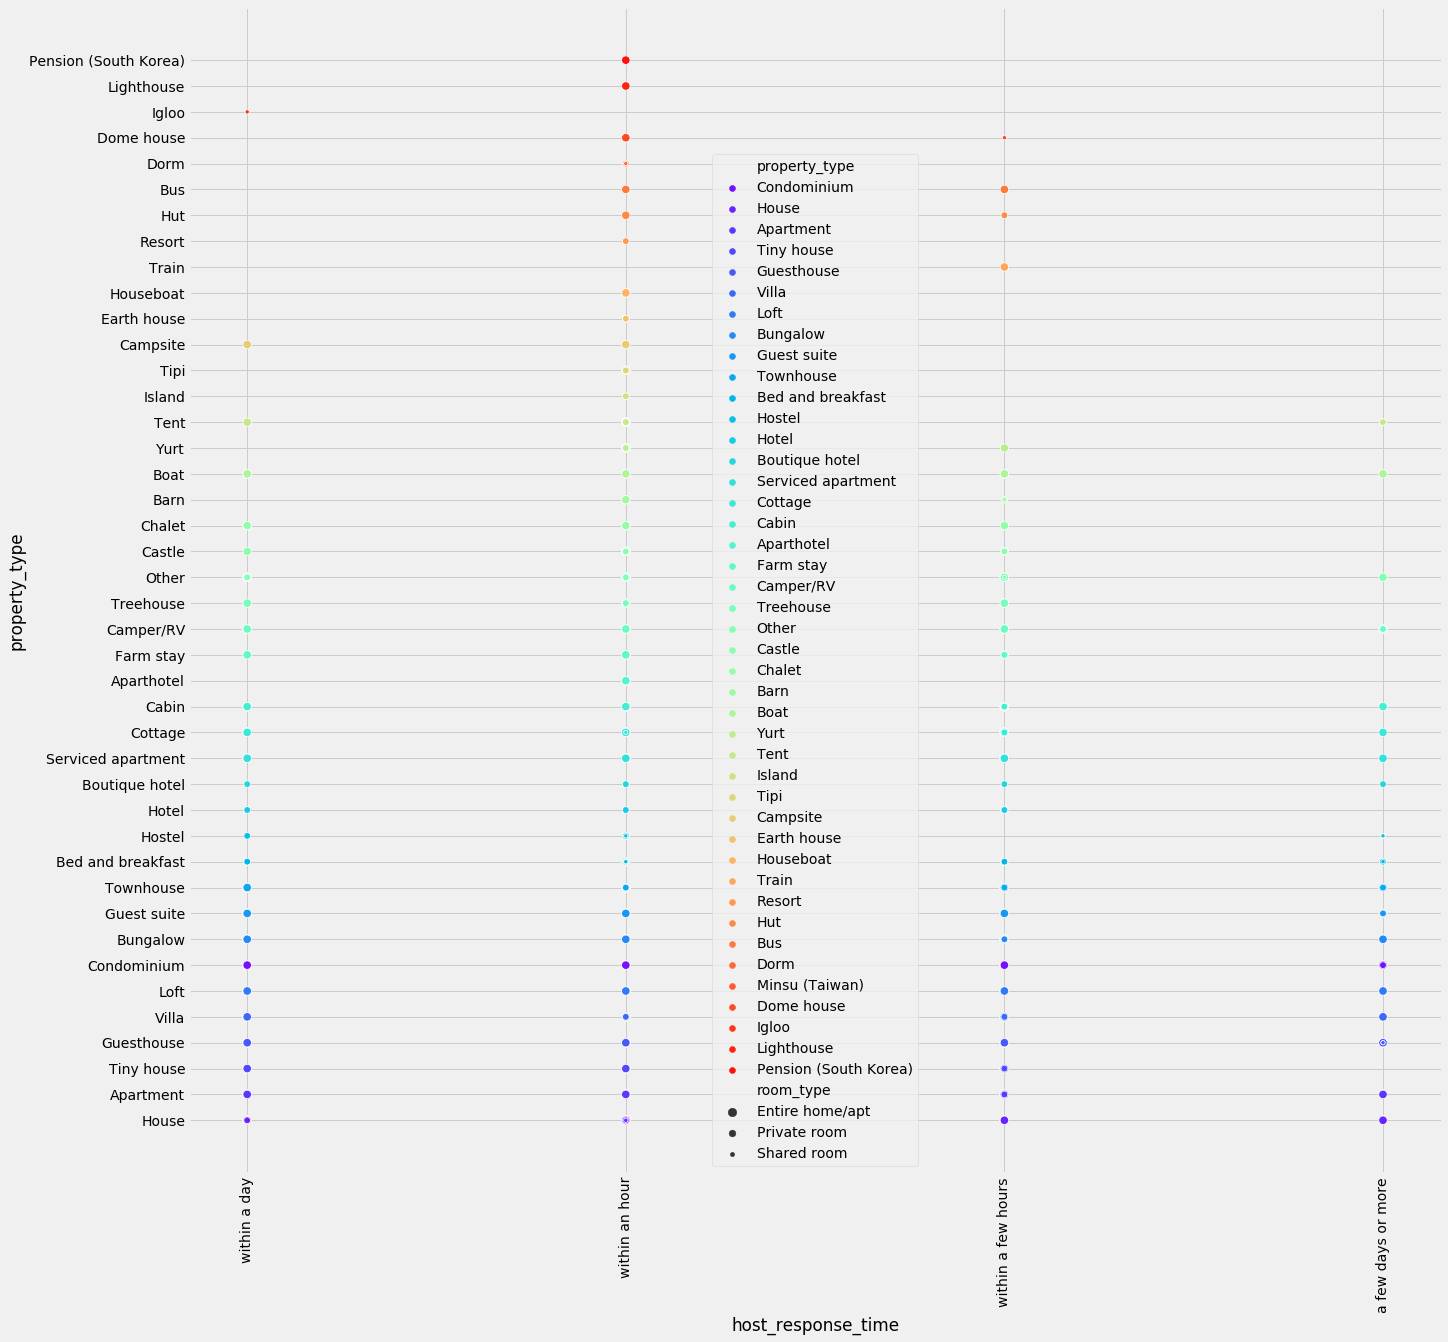

In [73]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.scatterplot(x='host_response_time',hue='property_type',size='room_type',y='property_type',palette='rainbow',data=df2)

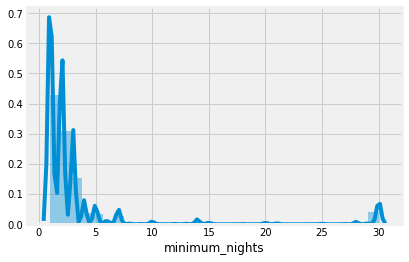

In [103]:
sns.distplot(df2[(df2['minimum_nights'] <= 30) & (df2['minimum_nights'] > 0)]['minimum_nights'], bins=31)
plt.ioff()